In [9]:
import PIL
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from IPython.display import display



In [10]:
file = 'readonly/msi_recruitment.gif'
image = Image.open(file).convert("RGB")

# image objects will be appended to this list
contact_images = []
# loading font
fnt = ImageFont.truetype("readonly/fanwood-webfont.ttf", 75)

channel_intensities = [0.1, 0.5, 0.9]
for channel_number in range(3):
    for intensity in channel_intensities:
        # creating a copy of the image so that modifications don't affect the original image object
        image_copy = image.copy()
        
        #creating a black background to write each image's information on
        text_background = ImageDraw.Draw(image_copy)
        text_background.rectangle((0, 375, 800, 450), fill="black", outline="black")

        #writing the description
        write_text = ImageDraw.ImageDraw(image_copy, "RGB")
        write_text.text((10, 375), "channel {} intensity {}".format(channel_number, intensity), font=fnt)

        #splitting the image into its component color channels
        channels = image_copy.split()

        # the split method returns a tuple
        # converting to a list to allow modification
        channels = list(channels)
        channels[channel_number] = channels[channel_number].point(lambda x : x* intensity)

        # converting back to a tuple to be passed in a parameter to the merge function
        channels = tuple(channels)
        combined_image = Image.merge("RGB", channels)
        contact_images.append(combined_image)

In [11]:
# getting the image width and height from the original image object
width, height = image.size

# creating a contact sheet to paste the images in
contact_sheet = Image.new(image.mode, (width * 3, height * 3))

x=0
y=0

for img in contact_images:
    contact_sheet.paste(img, (x, y) )
    if x+width == contact_sheet.width:
        x=0
        y=y+height
    else:
        x=x+width

# resizing the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width / 2), int(contact_sheet.height /2)))

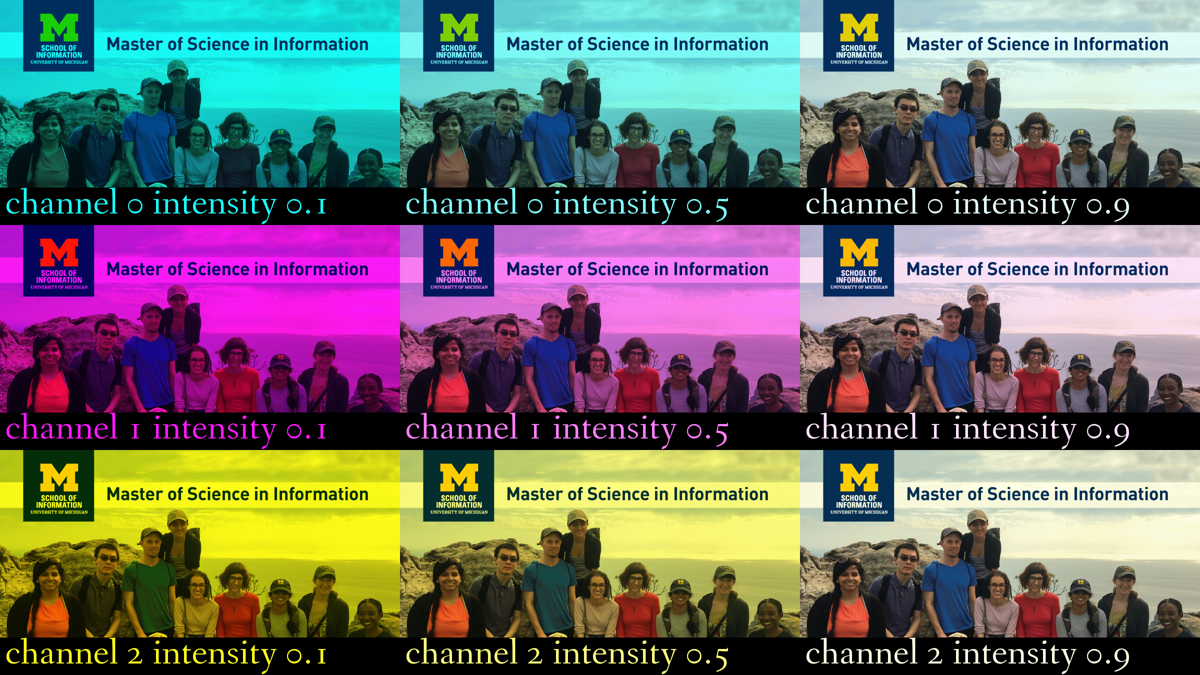

In [12]:
display(contact_sheet)